In [3]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
# an ordered dataset
odd_data= np.array([6,7,15,36,39,40,41,42,43,47,49])
odd_data

array([ 6,  7, 15, 36, 39, 40, 41, 42, 43, 47, 49])

<AxesSubplot:>

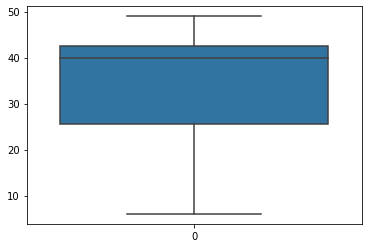

In [5]:
sns.boxplot(data=odd_data)

In [6]:
# numpy array summary statsitsics mean(), median(), amin(), amax(), ptp() is range of data, war(), std()
np.median(odd_data)

40.0

In [7]:
np.std(odd_data)

15.134657288477642

In [8]:
#  pandas has a .describe attribute, so convert the np.array to a pd.dataframe
odd_data_df=pd.DataFrame(odd_data)
odd_data_df

,0
0,6
1,7
2,15
3,36
4,39
5,40
6,41
7,42
8,43
9,47


In [9]:
odd_data_df.describe()

,0
count,11.000000
mean,33.181818
std,15.873362
min,6.000000
25%,25.500000
50%,40.000000
75%,42.500000
max,49.000000


In [36]:
np.percentile(odd_data,[25,50,75],interpolation='midpoint')

array([25.5, 40. , 42.5])

# Quartiles
Tukey's hinge method of finding quartiles \
use median to divide the ordered data into two halves \
If odd number in the dataset, include the median in both halves \
the lower quantileis the median of the lower half, and the upper quantile is the median of the upper half \
if even number, split the original ordered data in half and find the median of the lower half and the upper half

For the odd data above:  Tukey's hinge:Q1=25.5 and Q3=42.5

The problem with this is that this is finding the quantiles for a disrete distribution and we are really thinking of these numbers as numerical values with a continuous distribution.  There are many iterpolation methods for findng these percentiles.  One that is useful for engineers is to make sure that the quartiles land on a value from the dataset and you can use a nearest rank method (the percetile * the numebr of observations and  then round to the next observation number).  For odd data above:  Nearesk rank eneighbor:  Q1=15, Q3=43

Another way is the use an interpolation method to model bewteen adjacent ranks.  The numpy percentile call will do this with a default of interpolation='linear'.  For even number of observations in your data, this will matter.  For the odd data above:  Q1= 25.5; Q3=42.5

Note: For populations following a normal distribution, you can use the percentiles/percent point function (the quantile function) using the normal distribution to find the value of x at which 25% o 50% or 75% of the area under the standard normal curve is accouted for. The above distrubution is not normal. 

In [40]:
np.percentile(odd_data,[25,50,75],interpolation='linear')

array([25.5, 40. , 42.5])

In [41]:
from scipy.stats import norm
norm.ppf(0.25,loc=33.2,scale=15.9)

22.475612971882306

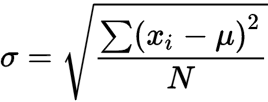 Standard deviation is a measure of the average distance between the values of the data in the set and the mean; it is calculated as the square root of the sum of the squared deviations from the mean, divided by the number of obseravtions

In [12]:
# The sample standard deviation using n-1 in the formula
mean_odd_data=np.mean(odd_data)
sum_of_squares_odd_data=np.sum((odd_data-mean_odd_data)**2)

In [13]:
n=len(odd_data)

In [14]:
sum_of_squares_odd_data

2519.6363636363635

In [15]:
np.sqrt(sum_of_squares_odd_data/(n-1))

15.873362478178224

In [16]:
# the pandas library uses n-1 as the default
# the numpy library uses n as the default for std

In [17]:
np.sqrt(sum_of_squares_odd_data/n)

15.134657288477642

In [18]:
# looking at an even array of data
even_data=np.array([7,15,36,39,40,41])

In [31]:
even_data_df=pd.DataFrame(even_data)
even_data_df.describe()

,0
count,6.000000
mean,29.666667
std,14.773851
min,7.000000
25%,20.250000
50%,37.500000
75%,39.750000
max,41.000000


For Tukey's hinge:  Q1=15, Q3=40 \
For nearest rank:  Q1= 15; Q3=40 \
For interpolation methods:

In [34]:
np.percentile(even_data,[25,50,75],interpolation='linear')

array([20.25, 37.5 , 39.75])

In [35]:
np.percentile(even_data,[25,50,75],interpolation='midpoint')

array([25.5, 37.5, 39.5])

In [42]:
from scipy.stats import norm
norm.ppf(0.25,loc=29.7,scale=14.8)

19.71755169709799

# Boxplots

Text(0.5, 0, 'Odd number of data elements')

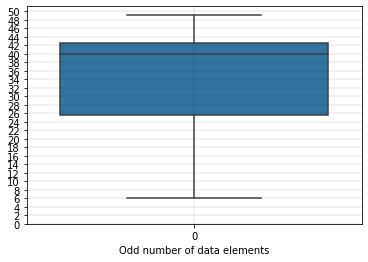

In [59]:
sns.boxplot(data=odd_data)
plt.yticks(np.arange(0,52,2))
plt.grid(b=True,which='major',color='black', linewidth=0.1)
plt.xlabel("Odd number of data elements")

5 number summary: min=6, Q1=25.5, Q2=40, Q3=42.5, max=49 \
Tukey's box and whisker plot:  as shown above \
Tukey's box and whisker plot always have an actual value in the dataset as the wisker values
IQR = Q3-Q1= 17.0 \
1.5* 17.0= 25.5 \
Upper Whisker = Q3 + 25.5 = 68.0 \
Lower Whsker = Q1 - 25.5 = 0 \
The length of the upper whisker is the largest value that is no greater than the Q3+1.5* IQR.  Since there are no outliers, the upper whisker becomes the max value=49.  Same for the lower whisker.  Otherwise, the whisker is the largest or smallest points inside the range defined by the 1.5* IQR formula and then the values for the outliers are shown.    